In [35]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, cross_val_predict,RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline

import shap 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes



In [36]:
df=pd.read_excel('/Users/Abdul/Desktop/MMA/Data Mining/Kickstarter.xlsx')
df.head()

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
0,1538064060,MAGIC PIXEL - Bluetooth full color LED display,15000.0,5933.0,failed,False,GB,GBP,2016-03-19 09:31:29,2016-03-19 09:31:32,...,18,2015,3,2,18,2016,9,62,30,30
1,556771080,SmartPi - Turn your Raspberry Pi into a SmartM...,9000.0,16552.0,successful,False,DE,EUR,2016-04-03 08:05:09,2016-04-03 08:05:10,...,8,2016,9,2,18,2016,8,9,45,45
2,839314928,PlantSitter - The World's Smartest Plant Monit...,60000.0,43234.0,canceled,False,US,USD,2016-03-29 08:01:08,2016-03-28 09:46:41,...,31,2016,5,2,18,2016,8,18,40,39
3,681077916,Digital Video LUT Box for Colorblindness Corre...,125000.0,1262.0,canceled,False,US,USD,2016-03-19 07:48:02,2016-02-23 09:30:28,...,28,2016,11,2,18,2016,7,20,30,5
4,1315415013,help send Object Collection to Norway!,2000.0,2300.0,successful,False,US,USD,2016-03-03 17:00:00,2016-03-03 17:00:00,...,16,2016,10,2,18,2016,7,1,14,14


In [37]:
#checking the dimensions of the data
df.shape

(15474, 45)

In [38]:
#Exploring the descriptive statistics of the data
df.describe()

,id,goal,pledged,deadline,state_changed_at,created_at,launched_at,backers_count,static_usd_rate,usd_pledged,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
count,1.547400e+04,1.547400e+04,1.547400e+04,15474,15474,15474,15474,15474.000000,15474.000000,1.547400e+04,...,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000
mean,1.071135e+09,9.777089e+04,1.978704e+04,2014-11-23 17:17:49.526819328,2014-11-21 02:33:26.250096896,2014-09-02 12:28:16.682111744,2014-10-19 22:03:32.033734144,181.169833,1.051427,1.997549e+04,...,15.531149,2014.169639,12.844772,6.615096,15.299212,2014.293460,12.589182,46.905648,34.682952,32.020098
min,1.645550e+05,1.000000e+00,0.000000e+00,2009-06-01 11:00:00,2009-05-05 20:41:27,2009-04-25 00:37:50,2009-04-25 10:36:21,0.000000,0.112727,0.000000e+00,...,1.000000,2009.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,1.000000,0.000000
25%,5.451956e+08,3.600000e+03,2.500000e+01,2014-08-10 16:53:31.750000128,2014-08-08 09:19:57.500000,2014-05-16 21:29:59,2014-07-10 10:23:14,2.000000,1.000000,2.486011e+01,...,8.000000,2014.000000,9.000000,4.000000,8.000000,2014.000000,9.000000,3.000000,30.000000,29.000000
50%,1.071634e+09,1.200000e+04,6.500000e+02,2015-02-19 10:54:45,2015-02-15 02:55:30,2014-11-18 21:00:56,2015-01-16 13:15:57.500000,12.000000,1.000000,6.768430e+02,...,15.000000,2014.000000,13.000000,7.000000,15.000000,2015.000000,13.000000,13.000000,30.000000,30.000000
75%,1.604739e+09,4.500000e+04,5.727500e+03,2015-08-02 10:20:51,2015-07-31 11:47:25.249999872,2015-05-26 19:52:53.750000128,2015-06-29 11:33:10.750000128,63.000000,1.000000,5.896877e+03,...,23.000000,2015.000000,17.000000,10.000000,23.000000,2015.000000,17.000000,43.000000,40.000000,35.000000
max,2.147388e+09,1.000000e+08,6.225355e+06,2016-04-18 04:13:25,2016-04-18 04:13:25,2016-02-17 14:49:34,2016-02-18 09:31:29,105857.000000,1.715913,6.225355e+06,...,31.000000,2016.000000,23.000000,12.000000,31.000000,2016.000000,23.000000,1528.000000,91.000000,91.000000
std,6.158555e+08,1.486588e+06,1.129384e+05,NaN,NaN,NaN,NaN,1287.826211,0.232488,1.144395e+05,...,8.748463,1.129148,5.918025,3.362745,8.784290,1.115405,5.587257,101.765225,11.976346,13.674964


In [39]:
df.columns

Index(['id', 'name', 'goal', 'pledged', 'state', 'disable_communication',
       'country', 'currency', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'category', 'spotlight', 'name_len', 'name_len_clean',
       'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days'],
      dtype='object')

In [40]:
# Creating a column to hold the converted goal amount in USD
df['goal_converted']=df['goal']*df['static_usd_rate']

In [41]:
# Storing the columns to drop in a list
cols_to_drop=['id','name','currency','goal','name_len','blurb_len','spotlight','created_at','launch_to_state_change_days','launched_at','pledged','deadline','backers_count','state_changed_at','deadline_yr','created_at_yr','launched_at_yr','state_changed_at_weekday','usd_pledged','static_usd_rate','state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr','state_changed_at_hr']
df.drop(cols_to_drop,axis=1,inplace=True)
df.head()

,state,disable_communication,country,staff_pick,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,...,deadline_hr,created_at_month,created_at_day,created_at_hr,launched_at_month,launched_at_day,launched_at_hr,create_to_launch_days,launch_to_deadline_days,goal_converted
0,failed,False,GB,False,Gadgets,8.0,14.0,Saturday,Friday,Thursday,...,9,12,18,3,2,18,9,62,30,21449.83740
1,successful,False,DE,False,NaN,6.0,15.0,Sunday,Monday,Thursday,...,8,2,8,9,2,18,8,9,45,10034.45163
2,canceled,False,US,False,Gadgets,8.0,12.0,Tuesday,Sunday,Thursday,...,8,1,31,5,2,18,8,18,40,60000.00000
3,canceled,False,US,False,Hardware,6.0,16.0,Saturday,Thursday,Thursday,...,7,1,28,11,2,18,7,20,30,125000.00000
4,successful,False,US,False,Experimental,5.0,13.0,Thursday,Tuesday,Thursday,...,17,2,16,10,2,18,7,1,14,2000.00000


In [42]:
# Checking the new dimensions of the data
df.shape

(15474, 22)

In [43]:
# checking the data types of the columns
df.dtypes

state                       object
disable_communication         bool
country                     object
staff_pick                    bool
category                    object
name_len_clean             float64
blurb_len_clean            float64
deadline_weekday            object
created_at_weekday          object
launched_at_weekday         object
deadline_month               int64
deadline_day                 int64
deadline_hr                  int64
created_at_month             int64
created_at_day               int64
created_at_hr                int64
launched_at_month            int64
launched_at_day              int64
launched_at_hr               int64
create_to_launch_days        int64
launch_to_deadline_days      int64
goal_converted             float64
dtype: object

In [44]:
# Converting 'disable_communication' and 'staff_pick' columns to int64
df['disable_communication'] = df['disable_communication'].astype('int64')
#df['staff_pick'] = df['staff_pick'].astype('int64')


In [45]:
# Checking the number of unique values in each categorical column
df.select_dtypes('object').nunique()

state                   4
country                18
category               23
deadline_weekday        7
created_at_weekday      7
launched_at_weekday     7
dtype: int64

In [46]:
# checking number of null values in each column
df.isnull().sum()

state                         0
disable_communication         0
country                       0
staff_pick                    0
category                   1392
name_len_clean                4
blurb_len_clean               4
deadline_weekday              0
created_at_weekday            0
launched_at_weekday           0
deadline_month                0
deadline_day                  0
deadline_hr                   0
created_at_month              0
created_at_day                0
created_at_hr                 0
launched_at_month             0
launched_at_day               0
launched_at_hr                0
create_to_launch_days         0
launch_to_deadline_days       0
goal_converted                0
dtype: int64

In [47]:
# view rows with null values
df[df.isnull().any(axis=1)]

,state,disable_communication,country,staff_pick,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,...,deadline_hr,created_at_month,created_at_day,created_at_hr,launched_at_month,launched_at_day,launched_at_hr,create_to_launch_days,launch_to_deadline_days,goal_converted
1,successful,0,DE,False,NaN,6.0,15.0,Sunday,Monday,Thursday,...,8,2,8,9,2,18,8,9,45,10034.45163
21,successful,0,US,False,NaN,5.0,11.0,Sunday,Friday,Wednesday,...,19,2,12,17,2,17,11,4,32,500.00000
22,failed,0,DE,False,NaN,2.0,14.0,Friday,Wednesday,Wednesday,...,11,1,20,13,2,17,11,27,30,6696.56310
39,successful,0,US,True,NaN,6.0,10.0,Thursday,Sunday,Tuesday,...,13,12,20,17,2,16,13,57,30,28000.00000
40,successful,0,US,False,NaN,4.0,7.0,Saturday,Tuesday,Tuesday,...,13,2,9,16,2,16,13,6,4,20.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15369,failed,0,US,False,NaN,8.0,13.0,Sunday,Thursday,Friday,...,3,6,3,10,6,4,12,1,50,50000.00000
15370,canceled,0,US,False,NaN,6.0,4.0,Monday,Thursday,Thursday,...,6,6,3,22,6,3,22,0,3,1000.00000
15375,successful,0,US,True,NaN,5.0,15.0,Thursday,Thursday,Monday,...,22,5,20,14,5,24,15,4,45,10000.00000
15394,failed,0,US,False,NaN,7.0,11.0,Tuesday,Thursday,Thursday,...,4,4,15,18,4,15,19,0,39,2000.00000


In [48]:
#dropping the null values
df.dropna(inplace=True)

In [49]:
# storing all categorical columns except the target in a list
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols.remove('state')

In [50]:
# Creating a second dataframe with dummy variables for all categorical columns; the original one will be used for  clustering
df2=pd.get_dummies(df,columns=cat_cols,drop_first=True, dtype='int')
# dropping staff pick column from df2 because it will be used in the clustering model and it is not a feature in the classification model
df2.drop('staff_pick',axis=1,inplace=True)

In [51]:
# checking the new dimensions of the data
df2.shape

(14078, 73)

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14078 entries, 0 to 15473
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          14078 non-null  object 
 1   disable_communication          14078 non-null  int64  
 2   name_len_clean                 14078 non-null  float64
 3   blurb_len_clean                14078 non-null  float64
 4   deadline_month                 14078 non-null  int64  
 5   deadline_day                   14078 non-null  int64  
 6   deadline_hr                    14078 non-null  int64  
 7   created_at_month               14078 non-null  int64  
 8   created_at_day                 14078 non-null  int64  
 9   created_at_hr                  14078 non-null  int64  
 10  launched_at_month              14078 non-null  int64  
 11  launched_at_day                14078 non-null  int64  
 12  launched_at_hr                 14078 non-null  int6

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


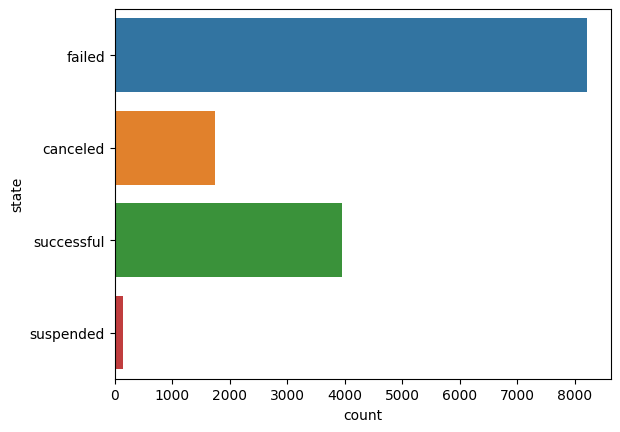

In [53]:
sns.countplot(y='state',data=df2);

In [54]:
# Excluding the canceled and suspended projects
df2 = df2[~df2['state'].isin(['canceled', 'suspended'])]


In [55]:
# checking the new dimensions of the data
df2.shape

(12181, 73)

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


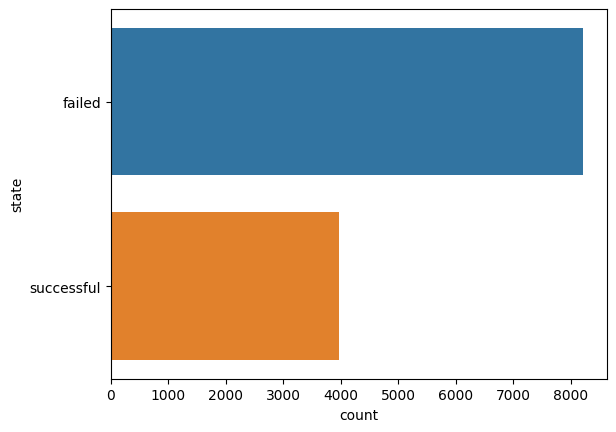

In [56]:
sns.countplot(y='state',data=df2);

In [57]:
X=df2.drop('state',axis=1)
y=df2['state']

In [58]:
random_forest = RandomForestClassifier()
# creating kfold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_pred = cross_val_predict(random_forest, X, y, cv=kf)

# Printing the classification report
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

      failed       0.76      0.90      0.82      8218
  successful       0.66      0.42      0.51      3963

    accuracy                           0.74     12181
   macro avg       0.71      0.66      0.67     12181
weighted avg       0.73      0.74      0.72     12181



In [59]:
gbc=GradientBoostingClassifier()

# Creating k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_pred = cross_val_predict(gbc, X, y, cv=kf)

# Printing the classification report
print("Classification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

      failed       0.78      0.87      0.83      8218
  successful       0.65      0.50      0.56      3963

    accuracy                           0.75     12181
   macro avg       0.72      0.68      0.69     12181
weighted avg       0.74      0.75      0.74     12181



In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Instantiating a Gradient Boosting classifier
gbc = GradientBoostingClassifier(max_features='sqrt', random_state=42)

# Defining the hyperparameter grid
gbc = GradientBoostingClassifier()

# Defining the hyperparameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,11]
}

# Creating KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Creating RandomizedSearchCV with KFold
random_search = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=kf, random_state=42)

# Fitting the RandomizedSearchCV on the full dataset
random_search.fit(X_train, y_train)

# Printing the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)
print('Best Score:', random_search.best_score_)

# Getting the best model
best_model = random_search.best_estimator_

# Making predictions on the full dataset
y_pred = best_model.predict(X_test)

# Printing the classification report
print("Classification Report on Full Dataset:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 157, 'subsample': 1.0}
Best Score: 0.7436377102773706
Classification Report on Full Dataset:
              precision    recall  f1-score   support

      failed       0.80      0.86      0.83      1652
  successful       0.64      0.54      0.59       785

    accuracy                           0.75      2437
   macro avg       0.72      0.70      0.71      2437
weighted avg       0.75      0.75      0.75      2437



In [61]:
# Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 157, 'subsample': 1.0}
tuned_params=random_search.best_params_

In [62]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

# Placeholder for the best threshold
best_thresholds = []
best_accuracies = []

# Looping over each fold
for train_index, test_index in skf.split(X, y):
    X_train_th, X_test_th = X.iloc[train_index], X.iloc[test_index]
    y_train_th, y_test_th = y.iloc[train_index], y.iloc[test_index]

    # Training the model
    model = GradientBoostingClassifier(**tuned_params)
    model.fit(X_train_th, y_train_th)

    # Finding the best threshold for this fold
    best_accuracy = 0
    best_threshold = 0.5
    thresholds = np.linspace(0, 1, 101)
    for th in thresholds:
        preds = np.where(model.predict_proba(X_test_th)[:, 1] >= th, 'successful', 'failed')
        acc = accuracy_score(y_test_th, preds)
        if acc > best_accuracy:
            best_accuracy = acc
            best_threshold = th

    best_thresholds.append(best_threshold)
    best_accuracies.append(best_accuracy)

# Calculate the average best threshold
final_best_threshold = np.mean(best_thresholds)
final_best_accuracy = np.mean(best_accuracies)

print(f'Average Best Threshold: {final_best_threshold}')
print(f'Average Best Accuracy: {final_best_accuracy}')

# Retraining the model on the entire dataset
final_model = GradientBoostingClassifier(**tuned_params)
final_model.fit(X, y)

# Final prediction 
final_preds = np.where(final_model.predict_proba(X)[:, 1] >= final_best_threshold, 'successful', 'failed')

# Final evaluation report
print('------------------------------------------------------------')
print(f'Final Model Performance with Threshold of {final_best_threshold}')
print(classification_report(y, final_preds, target_names=['failed', 'successful']))

Average Best Threshold: 0.492
Average Best Accuracy: 0.7540428317408211
------------------------------------------------------------
Final Model Performance with Threshold of 0.492
              precision    recall  f1-score   support

      failed       0.85      0.91      0.88      8218
  successful       0.77      0.67      0.72      3963

    accuracy                           0.83     12181
   macro avg       0.81      0.79      0.80     12181
weighted avg       0.83      0.83      0.83     12181



In [63]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(10)

,importance
goal_converted,0.219480
category_Web,0.121220
create_to_launch_days,0.104198
category_Software,0.070837
launch_to_deadline_days,0.057357
name_len_clean,0.048279
launched_at_hr,0.042981
deadline_hr,0.030473
deadline_day,0.026866
launched_at_day,0.022213


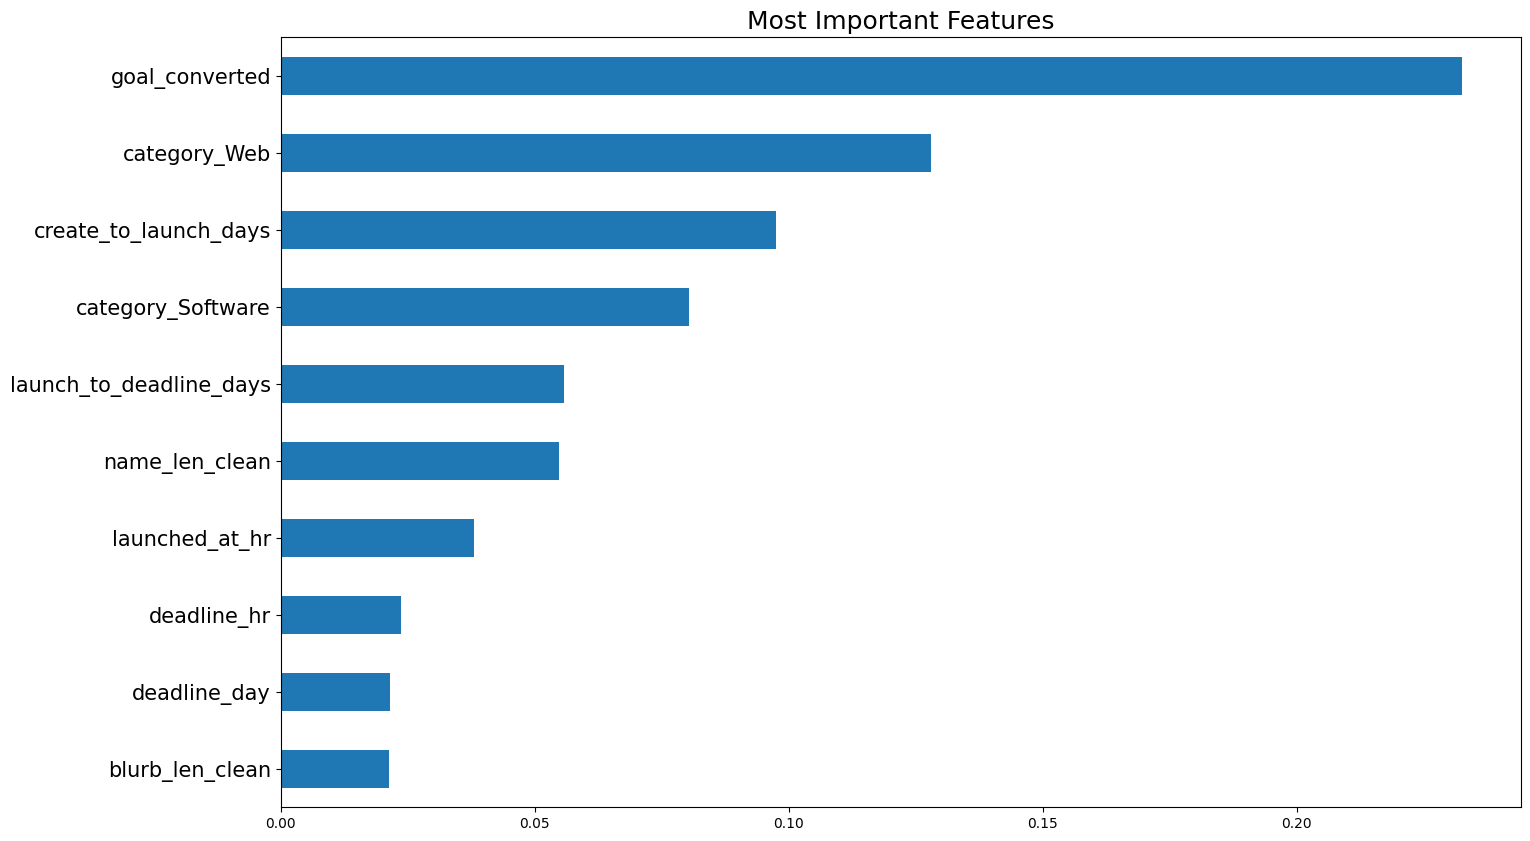

In [64]:
# Plotting the top features based on thier importance
(pd.Series(final_model.feature_importances_, index=X.columns)
    .nlargest(10)  
    .plot(kind='barh', figsize=[16,10])
    .invert_yaxis()) 
plt.yticks(size=15)
plt.title('Most Important Features', size=18);

100%|===================| 12155/12181 [00:54<00:00]        

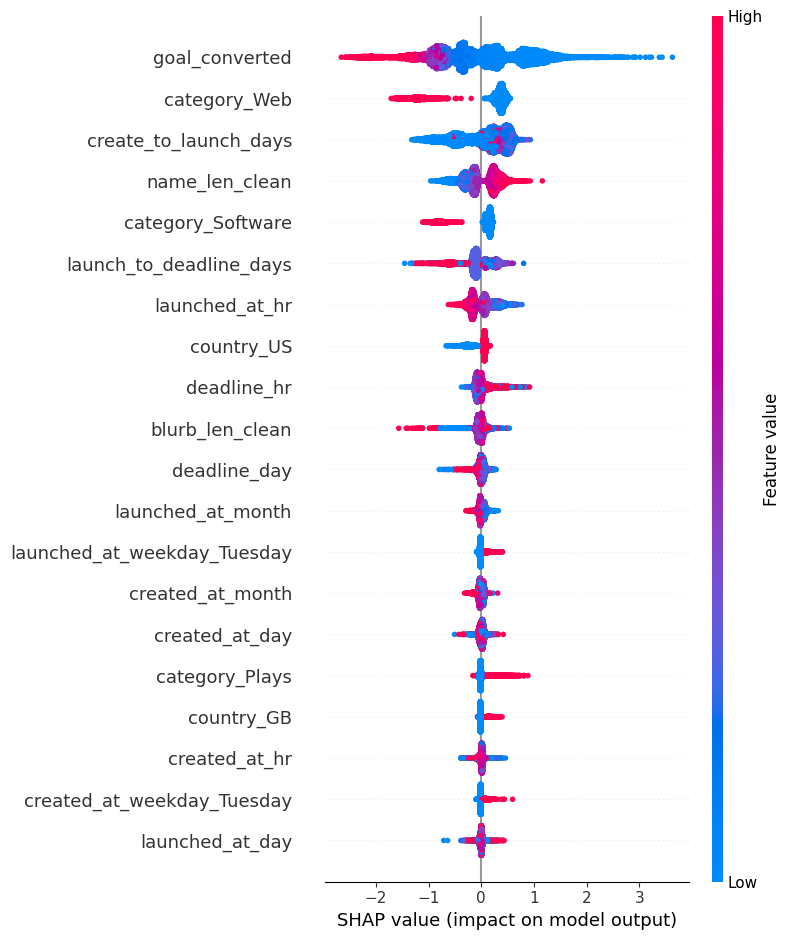

In [65]:
explainer = shap.Explainer(final_model, X, seed=42)
shap_values = explainer.shap_values(X)
# Summary plot
shap.summary_plot(shap_values, X)

In [66]:
##  Clustering

df.columns

Index(['state', 'disable_communication', 'country', 'staff_pick', 'category',
       'name_len_clean', 'blurb_len_clean', 'deadline_weekday',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_hr', 'created_at_month', 'created_at_day',
       'created_at_hr', 'launched_at_month', 'launched_at_day',
       'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days',
       'goal_converted'],
      dtype='object')

In [67]:
# Excluding the canceled and suspended projects
df = df[~df['state'].isin(['canceled', 'suspended'])]

In [68]:
num_features = ['goal_converted', 'create_to_launch_days', 'name_len_clean', 'launch_to_deadline_days', 'blurb_len_clean']

# Selecting the numeric features to be scaled and the other columns to be clustered
X_cluster_num = df[num_features]
category_column = df[['category','staff_pick']]

# Initializng the StandardScaler
scaler = StandardScaler()

# Transforming the numeric features
X_scaled_array = scaler.fit_transform(X_cluster_num)

# Concatenating the scaled numeric features with the other columns
X_combined = np.column_stack((X_scaled_array, category_column))
X_scaled = pd.DataFrame(X_combined, columns=num_features + ['category','staff_pick'])
X_scaled.head()

,goal_converted,create_to_launch_days,name_len_clean,launch_to_deadline_days,blurb_len_clean,category,staff_pick
0,-0.049827,0.150504,1.198746,-0.377655,0.298116,Gadgets,False
1,-0.065493,-0.447896,-0.045171,-1.70864,-0.017133,Experimental,False
2,-0.064687,-0.251699,-0.45981,2.117941,0.298116,Plays,False
3,-0.038913,-0.23208,-1.289088,0.204651,0.613364,Gadgets,False
4,-0.06596,-0.447896,1.613385,-0.377655,-0.332381,Gadgets,False


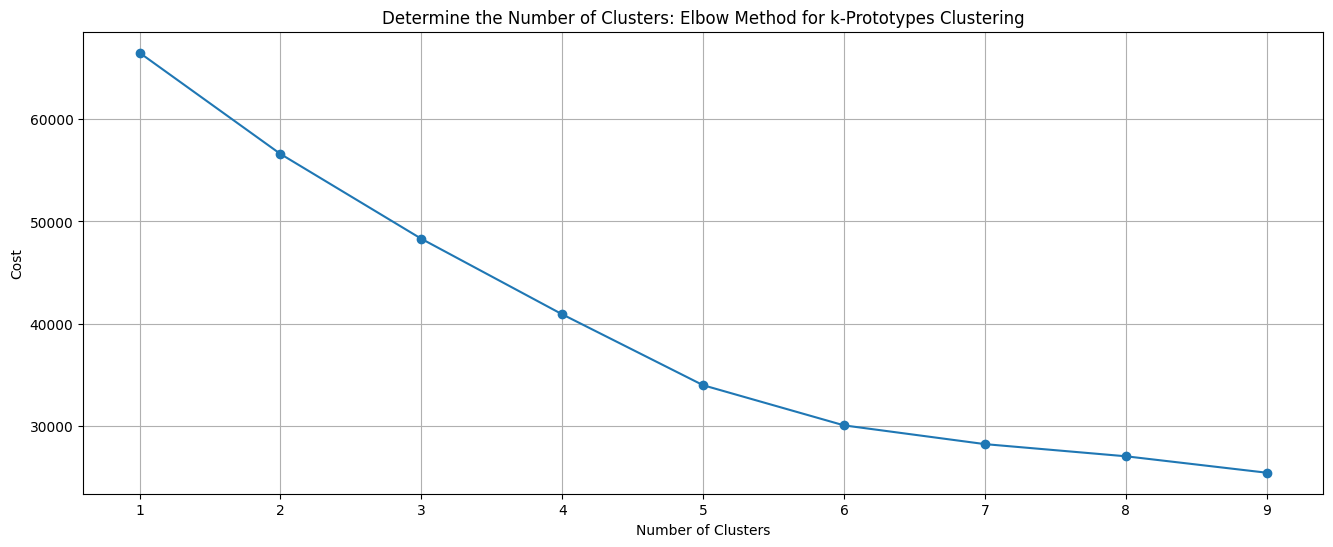

In [69]:
nbr_clusters_list = list(range(1, 10))
cat_cols = X_scaled.select_dtypes('object').columns.tolist()

cost_for_each_nbr_cluster = []

for nbr_clusters in nbr_clusters_list:
    
    
    # Initializing the KPrototypes model
    kproto = KPrototypes(n_clusters=nbr_clusters, random_state=42)

    # Fitting the model to the data
    kproto.fit(X_scaled, categorical=5)

    # Accessing the cost (sum of within cluster dissimilarities) of the model
    cost_for_each_nbr_cluster.append(kproto.cost_)

# Plotting the cost
plt.figure(figsize=(16, 6))
plt.plot(nbr_clusters_list, cost_for_each_nbr_cluster, marker='o')
plt.title("Determine the Number of Clusters: Elbow Method for k-Prototypes Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.grid()
plt.show()


In [70]:
kproto = KPrototypes(n_clusters=5, random_state=42,n_init=10)
kproto.fit(X_scaled, categorical=5)

KPrototypes(gamma=0.443095719727341, n_clusters=5, random_state=42)

In [71]:

cluster_centroids_scaled = kproto.cluster_centroids_

# Defining the number of numeric features
num_numeric_features = len(num_features)

# Separating numeric and categorical parts
cluster_centroids_numeric = cluster_centroids_scaled[:, :num_numeric_features]
cluster_centroids_categorical = cluster_centroids_scaled[:, num_numeric_features:]

# Reversing the scaling for the numeric features
cluster_centroids_original_numeric = scaler.inverse_transform(cluster_centroids_numeric)

# Concatenating the reversed numeric features with the categorical features
cluster_centroids_combined = np.column_stack((cluster_centroids_original_numeric, cluster_centroids_categorical))

# Creating a DataFrame with the correct column order
cluster_centroids_df = pd.DataFrame(cluster_centroids_combined, columns=num_features + ['staff_pick', 'category'])

# Displaying the DataFrame
cluster_centroids_df


,goal_converted,create_to_launch_days,name_len_clean,launch_to_deadline_days,blurb_len_clean,staff_pick,category
0,74296.4443028004,475.00941176470417,5.710588235294118,35.698823529411754,12.840000000000048,0.13176470588235295,Hardware
1,50125.67408502953,25.51502504173643,3.3232470784641666,29.321786310517634,11.539232053422293,0.08806343906510851,Web
2,45335.850539654624,36.96196868008962,6.990644702054034,30.51698189953236,14.597315436241516,0.15334553589587147,Hardware
3,143768.73858022684,30.54429760156675,4.644640234948608,56.209985315712174,12.944199706314224,0.07342143906020558,Web
4,56606002.60000002,11.999999999999964,4.5,39.75,10.5,0.0,Hardware


In [72]:
# creating a column with cluster labels 
df['cluster'] = kproto.labels_

In [73]:
#  checking the number of projects in each cluster
df['cluster'].value_counts(normalize=True)

cluster
2    0.403661
1    0.393400
3    0.167720
0    0.034890
4    0.000328
Name: proportion, dtype: float64

In [74]:
# Calculating the success rate for each cluster
print('Percentage of Project Success in Cluster 0')
print(df[df['cluster']==0]['state'].value_counts(normalize=True))
print('-------------------------------------------')
print('Percentage of Project Success in Cluster 1')
print(df[df['cluster']==1]['state'].value_counts(normalize=True))
print('-------------------------------------------')    
print('Percentage of Project Success in Cluster 2')
print(df[df['cluster']==2]['state'].value_counts(normalize=True))
print('-------------------------------------------')
print('Percentage of Project Success in Cluster 3')
print(df[df['cluster']==3]['state'].value_counts(normalize=True))
print('-------------------------------------------')
print('Percentage of Project Success in Cluster 4')
print(df[df['cluster']==4]['state'].value_counts(normalize=True))



Percentage of Project Success in Cluster 0
state
failed        0.698824
successful    0.301176
Name: proportion, dtype: float64
-------------------------------------------
Percentage of Project Success in Cluster 1
state
failed        0.718698
successful    0.281302
Name: proportion, dtype: float64
-------------------------------------------
Percentage of Project Success in Cluster 2
state
failed        0.581655
successful    0.418345
Name: proportion, dtype: float64
-------------------------------------------
Percentage of Project Success in Cluster 3
state
failed        0.789525
successful    0.210475
Name: proportion, dtype: float64
-------------------------------------------
Percentage of Project Success in Cluster 4
state
failed    1.0
Name: proportion, dtype: float64


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


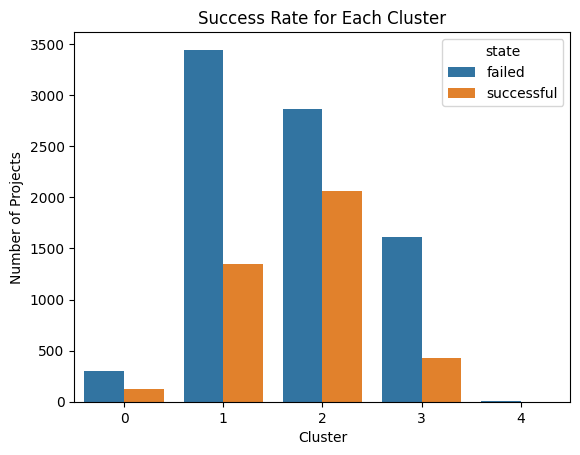

In [75]:
# plotting a grouped bar chart to visualize the success rate for each cluster


sns.countplot(x='cluster', hue='state', data=df)
plt.title('Success Rate for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Projects');
